# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Pieces of code that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Linear Regression and its implementation using python (Jupyter notebooks). Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [242]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Function to calculate the Gradiend descent
You may find helpful the use of cost (one of the costFunction output parameters) to debug this method
Hint: print("Iteration %d | Cost: %f" % (i, cost))

In [243]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    # TODO: HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    thetaHist=np.empty([maxsteps, 2])
    xTrans = x.transpose()
    for i in range(0, maxsteps):
        new_theta = compute_gradient(x,y,m,theta)
        theta[0] -= alpha*new_theta[0]
        theta[1] -= alpha*new_theta[1]

        thetaHist[i] = theta
   
    return theta, thetaHist

def compute_gradient(x, y, m, theta):
    new_theta = [0., 0.]
    for i in range(m):
        y_pred = np.dot(x[i],theta)
        new_theta[0] += (y_pred - y[i])*x[i][0]
        new_theta[1] += (y_pred - y[i])*x[i][1]
    new_theta[0] /= m
    new_theta[1] /= m
    return new_theta

## Function to calcultate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the implementation having not only the cost but also the difference between y and the prediction directly (loss).

In [244]:
def costFunction(x, y, theta, m):
    # TODO: HERE YOU HAVE TO IMPLEMENT THE COST FUNCTION
    cost = 0
    loss = 0
    for i in range(m):
        y_pred = np.dot(x[i],theta)
        loss += y_pred - y[i]
        cost += (y_pred-y[i])**2
    cost  *= 1 / (2*m)
    return cost, loss


## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with 9 instances). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [245]:
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [246]:
m, n = np.shape(x)

## Plot training set


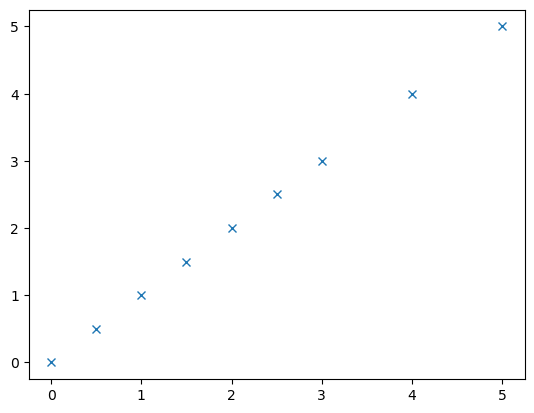

In [247]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [248]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

# Calculate values of the cost function
J = np.empty([len(theta0), len(theta1)])
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # TODO: HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        theta = [theta0[i], theta1[j]]
        J[i][j] = costFunction(x,y,theta,m)[0]


## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


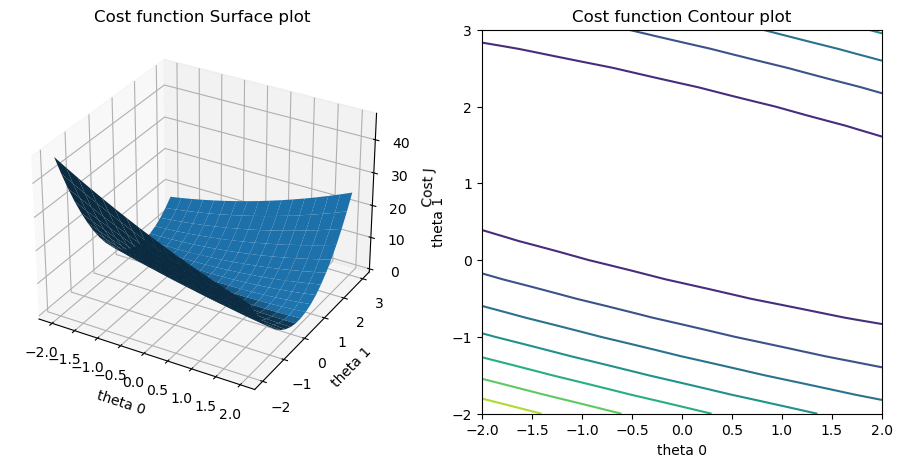

In [249]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [250]:
alpha = 0.05        # learning parameter
maxsteps= 100000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
cost = costFunction(x,y,thet,m)[0]

## Print found optimal values



In [251]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
print('Cost = ', cost)

Optimized Theta0 is  8.88178419700143e-16
Optimized Theta1 is  0.9999999999999996
Cost =  1.8078062411315028e-31


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


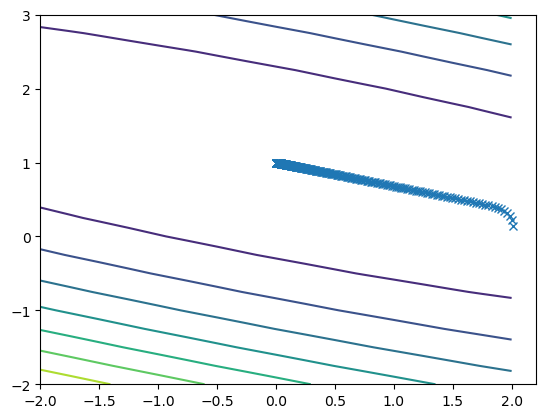

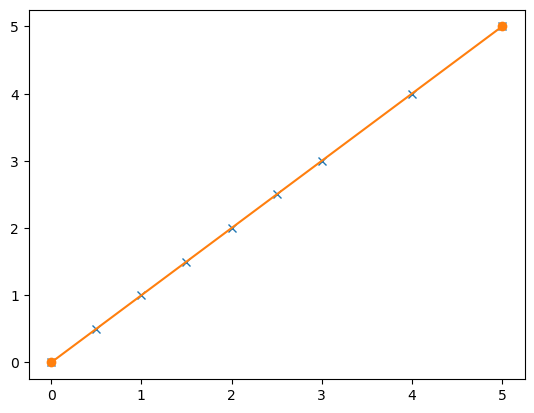

In [252]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

## 1. What happens if the learning rate is too low?

### Advantage:
The regression function may have less cost with a low learning rate. (If it stops when it converges. In our case, this is not true since we have maxsteps.) 

### Disadvantage:
+ Gradient descent will converge slower. 
+ It needs more steps to find a better results. In the limited maxsteps, it may not be able to perform as good as 'just right' learning rate.

### Test:
When alpha = 0.001, cost = 2.8139274967316945e-27  
When alpha = 0.05, cost = 1.8078062411315028e-31  
#### addition:
If it stops when it converges, the gradient descent with lower learning rate is supposed to get more accurate result (also depends on the threshold of converge).  
But in our case, we only have 'maxsteps'. The gradient descent with lower learning rate needs more iteration to get the lowest place comparing with 'just right' learning rate. And our running time depends on this 'maxsteps'. So in the limited iteration times, the running time of different learning rate are same, but 'just right' learning rate can get a better accuracy.

In [253]:
alpha = 0.001        # learning parameter
maxsteps= 100000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
cost = costFunction(x,y,thet,m)

In [254]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
print('Cost = ', cost[0])

Optimized Theta0 is  1.2410702288388326e-13
Optimized Theta1 is  0.9999999999999541
Cost =  2.8139274967316945e-27


## 2. What happens if the learning rate is too high?

### Advantage:
Gradient descent will converge quicker.  

### Disadvantage:
The regression function may have lager cost with a high learning rate. When the learning rate is too large, it will always miss the minimal value of cost and thus fail to converge.

In [255]:
alpha = 0.9       # learning parameter
maxsteps= 100000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
cost = costFunction(x,y,thet,m)

C:\Users\AnkieF\AppData\Local\Temp\ipykernel_20740\2542737418.py:19: RuntimeWarning: overflow encountered in double_scalars
  new_theta[1] += (y_pred - y[i])*x[i][1]


In [256]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
print('Cost = ', cost[0])

Optimized Theta0 is  nan
Optimized Theta1 is  nan
Cost =  nan


## 3. Can Linear Regression really find the absolute global minimum?
Yes. We can see from the graph of cost function, it convex, which always has a lowest point. In fact, this cost function is Mean Square Error, which is $\frac{1}{2m}\sum^m_{i=1}(f_{theta}(x^{(i)})-y^{(i)})^2$. This is the quadratic function on x. It should always have a lowest point.

In [257]:
x_train = np.array([[1,1.0], [1,1.7], [1,2.0],[1,2.5], [1,3.0], [1,3.2]])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [258]:
theta0 = np.arange(-100,501,1)
theta1 = np.arange(-200,301,1)

J = np.empty([len(theta0), len(theta1)])
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        theta = [theta0[i], theta1[j]]
        J[i][j] = costFunction(x_train,y_train,theta,len(x_train))[0]


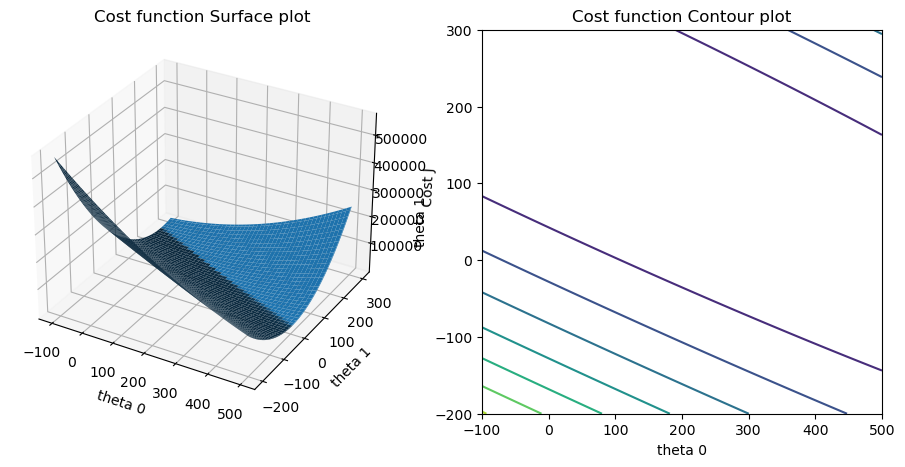

In [259]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## 4. What effect does it have if you change the initial guess for thet0 and thet1 for the gradient descent to something completely off?
As we discussed before, normally Linear Regression with Gradient Descent will stop when it converges. In this case, it doesn't really matter what initial guess is. It will find the minimum cost anyway. But it will takes longer time to find it since it needs more iteration.  

In [260]:
alpha = 0.05       # learning parameter
maxsteps= 100000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [-10000, -5000]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
cost = costFunction(x,y,thet,m)

In [261]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
print('Cost = ', cost[0])

Optimized Theta0 is  -1.387778780781428e-15
Optimized Theta1 is  1.0000000000000007
Cost =  4.454461969151606e-31


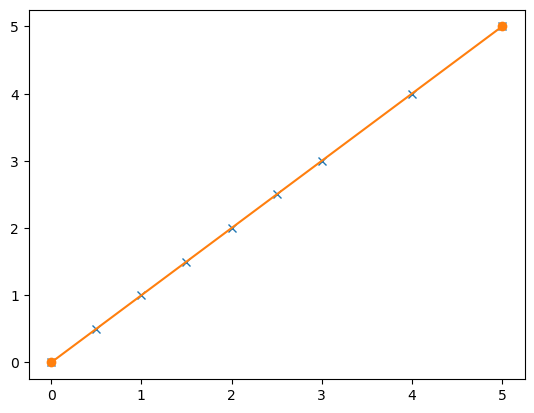

In [262]:
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

But in our case, we have limited iteration times. So actually how well it can perform mostly depends on this limitation. We set `maxsteps` to be large enough before. So this time we can try a small one:

In [263]:
alpha = 0.05       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [-10000, -5000]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
cost = costFunction(x,y,thet,m)

In [264]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
print('Cost = ', cost[0])

Optimized Theta0 is  -0.001443266039219048
Optimized Theta1 is  1.0004614844509032
Cost =  3.5267259306967966e-07


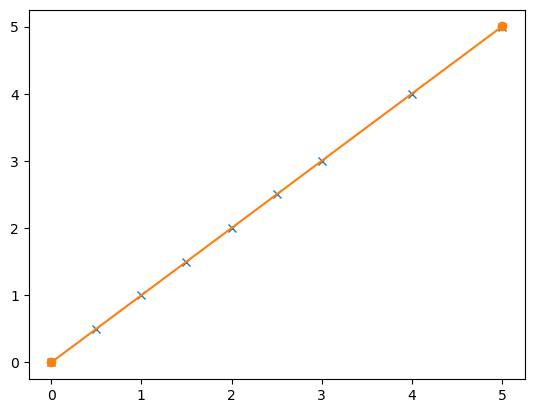

In [265]:
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

We can see from above that the cost is really high and it doesn't work.

## 5. What happens if you are not updating thet0 and thet1 “simultaneously” as you should but you are updating both parameters in separate for-loops (see code)?



In [ ]:
def gradientDescent2(x, y, theta, alpha, m, maxsteps):
    thetaHist=np.empty([maxsteps, 2])
    for i in range(0, maxsteps):
        new_thet0 = 0.
        for i in range(m):
            y_pred = np.dot(x[i],theta)
            new_thet0 += (y_pred - y[i])*x[i][0]
        new_thet0 /= m
        theta[0] -= alpha*new_thet0

        new_thet1 = 0.
        for i in range(m):
            y_pred = np.dot(x[i],theta)
            new_thet1 += (y_pred - y[i])*x[i][1]
        new_thet1 /= m
        theta[1] -= alpha*new_thet1

        thetaHist[i] = theta
   
    return theta, thetaHist

It doesn't effect much if iteration time is large and alpha is small. Cuz when alpha is small, the change of thet0 too really small to effect thet1. And when iteration time is large, the gradient descent will get more closer to the minimum cost.

In [296]:
alpha = 0.05       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [-100, 200]

thet, thetaHist = gradientDescent(x_train, y_train, thet, alpha, len(x_train), maxsteps)
cost = costFunction(x_train,y_train,thet,len(x_train))
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
print('Cost = ', cost[0])

Optimized Theta0 is  1.440208907427879
Optimized Theta1 is  209.76378082747948
Cost =  1735.933258929354


In [297]:
alpha = 0.05       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [-100, 200]

thet, thetaHist = gradientDescent2(x_train, y_train, thet, alpha, len(x_train), maxsteps)
cost = costFunction(x_train,y_train,thet,len(x_train))
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
print('Cost = ', cost[0])

Optimized Theta0 is  1.6100374322441473
Optimized Theta1 is  209.69318254343634
Cost =  1735.9174174229495


But if the alpha is big and iteration time is small, we can see the difference clearly.

In [298]:
alpha = 0.1       # learning parameter
maxsteps= 10      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [-100, 200]

thet, thetaHist = gradientDescent(x_train, y_train, thet, alpha, len(x_train), maxsteps)
cost = costFunction(x_train,y_train,thet,len(x_train))

In [299]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
print('Cost = ', cost[0])

Optimized Theta0 is  -74.89074043400569
Optimized Theta1 is  240.9019883765348
Cost =  2045.7809417867675


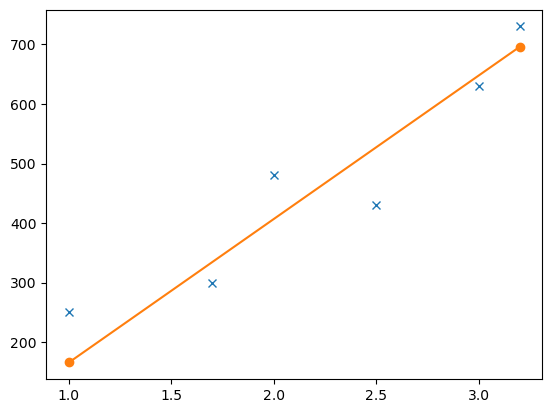

In [300]:
xs = np.array([x_train[0,1], x_train[x_train.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x_train[:,1], y_train, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

In [301]:
alpha = 0.1       # learning parameter
maxsteps= 10      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [-100, 200]

thet, thetaHist = gradientDescent2(x_train, y_train, thet, alpha, len(x_train), maxsteps)
cost = costFunction(x_train,y_train,thet,len(x_train))

In [302]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
print('Cost = ', cost[0])

Optimized Theta0 is  -73.00457902297346
Optimized Theta1 is  239.87355535930783
Cost =  2030.3249414215147


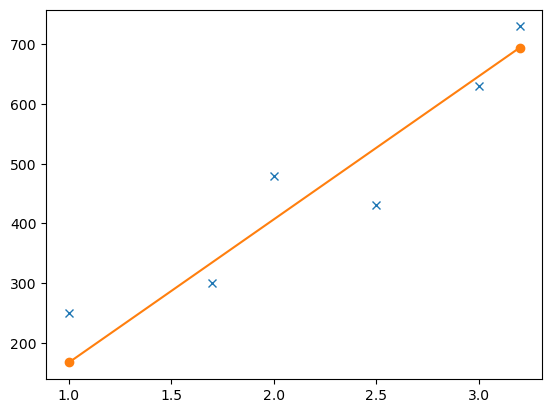

In [303]:
xs = np.array([x_train[0,1], x_train[x_train.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x_train[:,1], y_train, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

## 6. How many iterations of the gradient descent algorithm do you have to perform to reach the correct exact values of theta0 and theta1?
Set threshold as 0.00001. If the cost is below this, we recognize it reaching the correct exact values of theta0 and theta1.

In [273]:
threshold = 0.00001
alpha = 0.05
for k in range(10000):
    maxsteps= k      # number of iterations that the algorithm is running
    thet = [2, 0]
    thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
    cost = costFunction(x,y,thet,m)[0]
    if(cost<threshold):
        print(k)
        break

363


After 363 times, it reaches the correct exact values with threshold = 0.00001

In [274]:
threshold = 0.000000000000001
alpha = 0.05
for k in range(10000):
    maxsteps= k      # number of iterations that the algorithm is running
    thet = [2, 0]
    thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
    cost = costFunction(x,y,thet,m)[0]
    if(cost<threshold):
        print(k)
        break

1107


After 1107 times, it reaches the correct exact values with threshold = 1e-15